In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
def read_data():
    datas =pd.read_csv('train.csv')
    pd.to_pickle(datas,'train_pickle.csv')
    return datas
    

In [3]:
import os
print (os.path.exists('train_pickle.csv')) # To check whether a file exists at a place or not 
data = pd.DataFrame(read_data())

True


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#Check whether we can deal with multiple values at a time
def name_extract(word):
    split = word.split(',')
    family_name = split[0]
    name = split[1].split('.')[0].strip()
    return name

In [31]:
data_for_test = pd.DataFrame({'Salutation':data['Name'].apply(name_extract)})

In [32]:
data_for_test.head()


,Salutation
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [6]:
# Some basic parameters for analysis

no_of_men = data[data['Sex']=='male']
no_of_female = data[data['Sex']!='male']
print ('Composition of male / female : '+str((round(len(no_of_men)*1.0/len(data),2))) + " / " + str(round(len(no_of_female)*1.0/len(data),2)))
print ('Composition of Surivial : '+ str(round(len(data[data['Survived']==1])*1.0/len(data),2)))

#No of surivals per sex
print ('Compositon of survival in male:' + str(round(float(len(no_of_men[no_of_men['Survived']==1]))/len(no_of_men),2)))
print ('Compositon of survival in male:' + str(round(float(len(no_of_female[no_of_female['Survived']==1]))/len(no_of_female),2)))

Composition of male / female : 0.65 / 0.35
Composition of Surivial : 0.38
Compositon of survival in male:0.19
Compositon of survival in male:0.74


In [7]:
# #Now we use onne hot encoding method to convert the embarked(categorical data point) to numerical data point 
# categoricals = ['Embarked']
# data_packed =data[categoricals].apply(lambda x : {x:1})
# data_unpacked = data_packed.unpack(feature_prefix = categoricals)
# print data_packed

In [8]:
def create_dataframe(column,dictionary):
    items = dictionary.items() 
    index =dictionary[column]
    #print items
    d = pd.DataFrame(items[0][1],columns=[items[0][0]])
    for i in xrange(len(dictionary)):
        d[items[i][0]] = items[i][1]
    return d

In [9]:
def count_survival_against(column,data):
    unique_values = data[column].unique().tolist() # fetches numpy array 
    count_survivals = [0]*len(unique_values)
    percent_survival = [0]*len(unique_values)
    i=0
    for val in unique_values:
        count_survivals[i] = len(data[(data[column]==val) & (data['Survived']==1)])
        #print count_survivals[i]
        percent_survival[i] = round((count_survivals[i]*1.0/len(data[data[column]==val])),2)
        i +=1
    dictionary = {column:unique_values,
                  "Survival Count":count_survivals,
                  "Percent Survival": percent_survival
                  }
    d = create_dataframe(column,dictionary)
    d.set_index(column,inplace=True)
    d.sort_index(ascending=True,inplace=True)
    return d

In [11]:
#AGAINST WHOLE DATA SET
d = count_survival_against('Pclass',data)
print ("Overall",d)
#AGAINST MALE AND FEMALE 
m = count_survival_against('Pclass',no_of_men)
f = count_survival_against('Pclass',no_of_female)
print ("Male : " ,m)
print ("female : ",f)

TypeError: 'dict_items' object does not support indexing

In [12]:
# #Some basic Information regarding the exploration of pandas
# print ((data.dtypes))
# print (type(data.dtypes))

# print (data.info())

In [13]:
data.describe()[['Age','Fare']]

/Users/harisai/Programming/Anaconda/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,NaN,7.910400
50%,NaN,14.454200
75%,NaN,31.000000
max,80.000000,512.329200


In [14]:
def gets_sub_distributions(data,against,filters):
    if(filters==''): #if No filters jump to against
        for var in against:
            print ("Providing distribution of "+str(var)+"On whole data")
            data[var].hist()
            print ("Mean : ",data[var].mean())
            print ("Median : ",data[var].median())
            p.xlabel(var)
            p.ylabel('Passenger Count')
            p.show()
            print ("_______XXXXXX________")
    else : #if there is any filter assigned
        for var in against:
            filtered_var = data[filters].unique().tolist()
            for f_var in filtered_var:
                print ("Providing distribution of "+ str(var)+" with filter on "+str(filters)+"(Filter :"+str(f_var)+")")
                data[data[filters]==f_var][var].hist()
                print("Mean  :",data[data[filters]==f_var][var].mean())
                print("Median  :",data[data[filters]==f_var][var].median())
                p.xlabel(var)
                p.ylabel('Passenger Count')
                p.show()
                print ("_______XXXXXX________")

In [15]:
#Distribuition of Different components with others
import pylab as p
%pylab inline
def get_distributions(data,label,against,filters):
#     label = 'Pclass'
#     against = ['Age','Fare']
#     filters = 'Survived'
    
    if(label== ''): # Empty label ,consider all data points
        gets_sub_distributions(data,against,filters)
    else :
        label_var = data[label].unique().tolist()
        for var in label_var:
            print ("Printing distribution for label :  "+label +" "+str(var))
            gets_sub_distributions(data[data[label]==var],against,filters)
            print ("_________XXXXXXX_____________")
        

Populating the interactive namespace from numpy and matplotlib


Printing distribution for label :  Pclass 3
Providing distribution of Age with filter on Survived(Filter :0)
Mean  : 26.555555555555557
Median  : 25.0


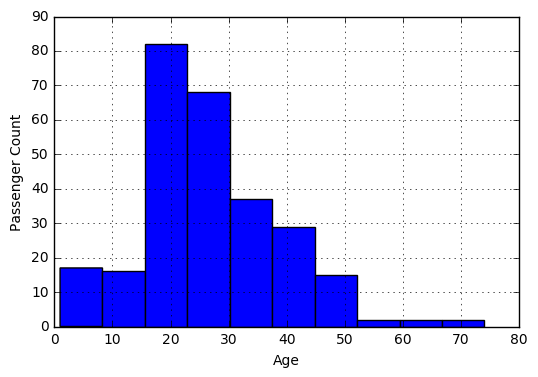

_______XXXXXX________
Providing distribution of Age with filter on Survived(Filter :1)
Mean  : 20.646117647058823
Median  : 22.0


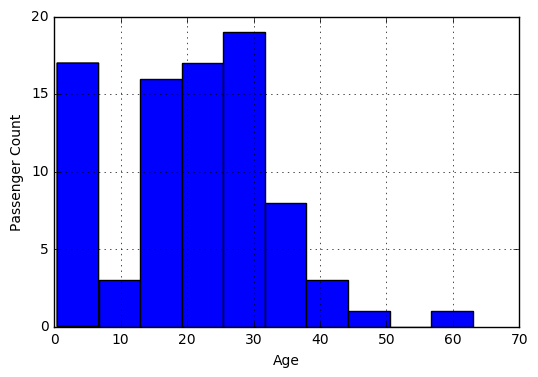

_______XXXXXX________
Providing distribution of Fare with filter on Survived(Filter :0)
Mean  : 13.66936424731183
Median  : 8.05


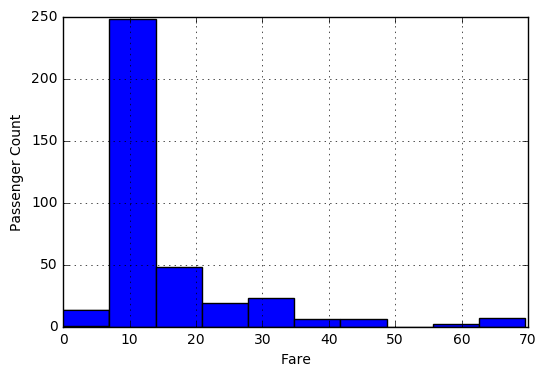

_______XXXXXX________
Providing distribution of Fare with filter on Survived(Filter :1)
Mean  : 13.694887394957966
Median  : 8.5167


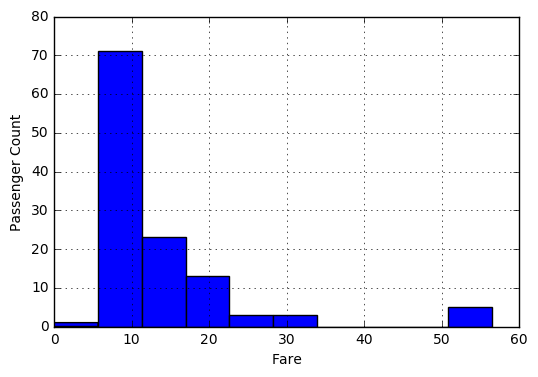

_______XXXXXX________
_________XXXXXXX_____________
Printing distribution for label :  Pclass 1
Providing distribution of Age with filter on Survived(Filter :1)
Mean  : 35.36819672131148
Median  : 35.0


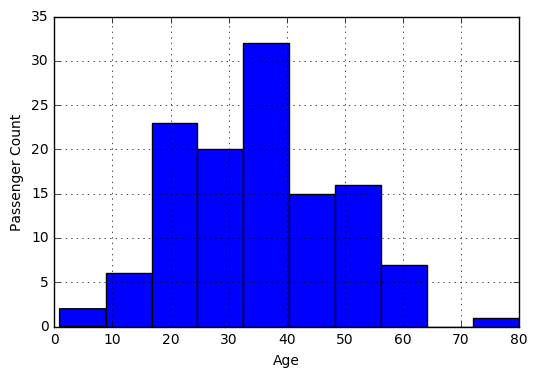

_______XXXXXX________
Providing distribution of Age with filter on Survived(Filter :0)
Mean  : 43.6953125
Median  : 45.25


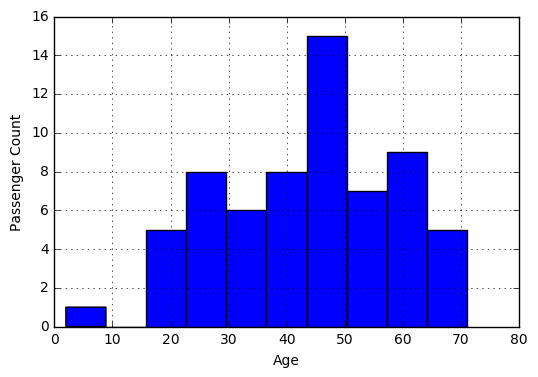

_______XXXXXX________
Providing distribution of Fare with filter on Survived(Filter :1)
Mean  : 95.60802867647055
Median  : 77.9583


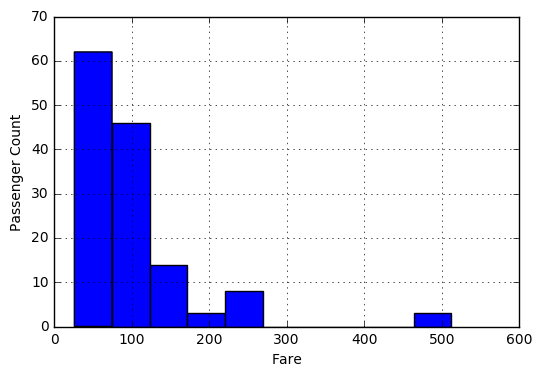

_______XXXXXX________
Providing distribution of Fare with filter on Survived(Filter :0)
Mean  : 64.68400750000002
Median  : 44.75


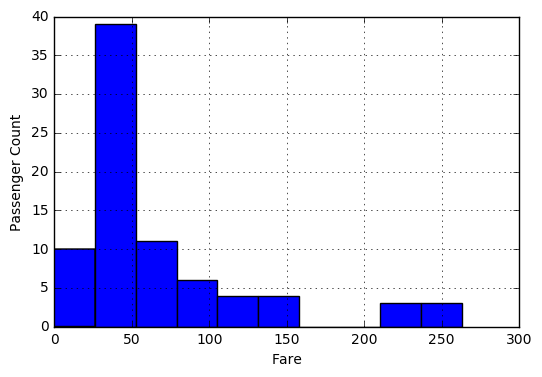

_______XXXXXX________
_________XXXXXXX_____________
Printing distribution for label :  Pclass 2
Providing distribution of Age with filter on Survived(Filter :1)
Mean  : 25.90156626506024
Median  : 28.0


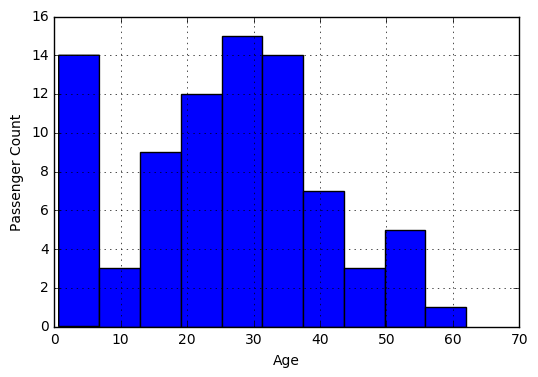

_______XXXXXX________
Providing distribution of Age with filter on Survived(Filter :0)
Mean  : 33.544444444444444
Median  : 30.5


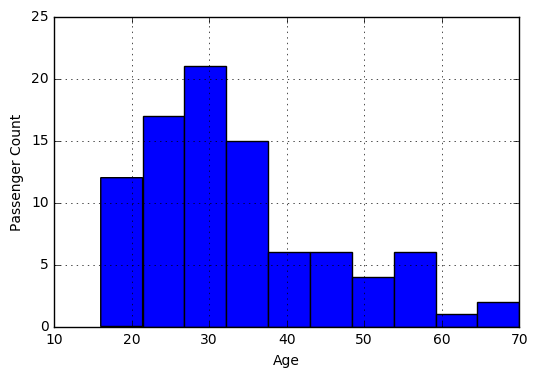

_______XXXXXX________
Providing distribution of Fare with filter on Survived(Filter :1)
Mean  : 22.0557
Median  : 21.0


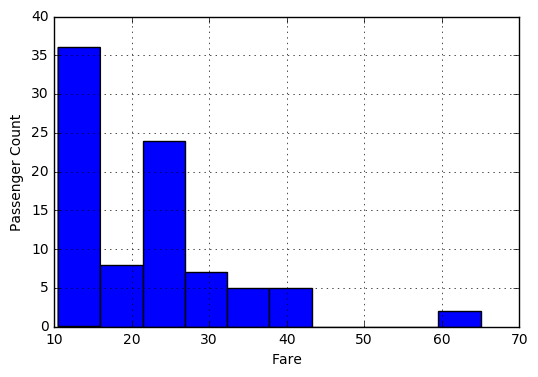

_______XXXXXX________
Providing distribution of Fare with filter on Survived(Filter :0)
Mean  : 19.412327835051546
Median  : 13.0


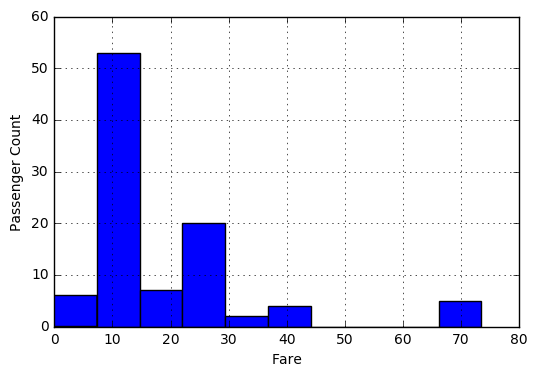

_______XXXXXX________
_________XXXXXXX_____________


In [16]:
get_distributions(data,'Pclass',['Age','Fare'],'Survived')

Printing distribution for label :  Pclass 3
Providing distribution of AgeOn whole data
Mean :  25.14061971830986
Median :  24.0


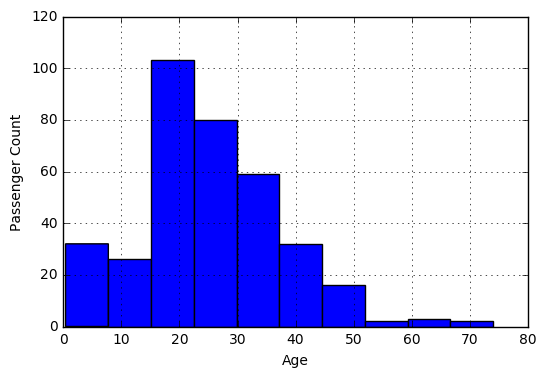

_______XXXXXX________
_________XXXXXXX_____________
Printing distribution for label :  Pclass 1
Providing distribution of AgeOn whole data
Mean :  38.233440860215055
Median :  37.0


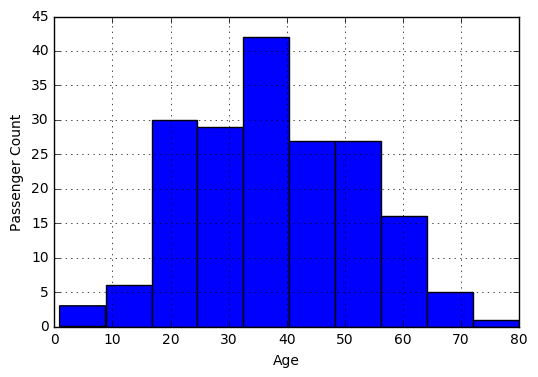

_______XXXXXX________
_________XXXXXXX_____________
Printing distribution for label :  Pclass 2
Providing distribution of AgeOn whole data
Mean :  29.87763005780347
Median :  29.0


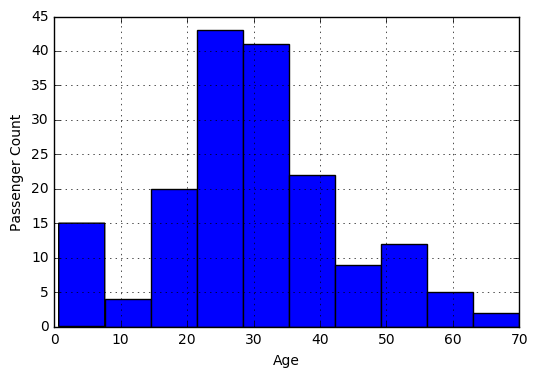

_______XXXXXX________
_________XXXXXXX_____________


In [17]:
get_distributions(data,'Pclass',['Age'],'')

In [19]:
def manipulate_age(row):
    print (row)
    if(pd.isnull(row)):
        if(Pclass==1):
            row=37
        elif(Pclass==2):
            row=29
        else:
            row=24
    return row

In [20]:
data = data[['Age','Pclass']].apply(manipulate_age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index Age')